# MAT 258A: Numerical Optimization
# Homework 1,  Minjie Fan, 998585352
# 09/29/2015

## Exercise 1

* Assume that $P$ projects vectors from $\mathbb{R}^n$ to a subspace $W$, where $dim(W)>0$ since $P\neq 0$. Then for any $w \in W$, $Pw=w$.

$||P||_2 = sup_{||x||_2=1}||Px||_2 \geq ||Pw_0||_2$, where $w_0 \in W$ and $||w_0||_2=1$.

Then $||P||_2\geq ||Pw_0||_2=||w_0||_2=1$.

* If $P$ is an orthogonal projector, i.e., $P^2=P$ and $P^T=P$.

This implies that $P$ has real eigenvalues $0$ and $1$. Since $P \neq 0$, $P$ has eigenvalues $1$.

Then $||P||_2=(\lambda_{max}(P^TP))^{1/2}=(\lambda_{max}(P))^{1/2}=1$.

* If $||P||_2=1$, we take any non-zero element $x$ from $\mathbb{R}^n$.

Then $x = Px+(I-P)x$.

Since $P^2=P$ and $P^T=P$ (orthogonal projector), we have

$||x||^2_2=||Px+(I-P)x||^2_2=||Px||^2_2+||(I-P)x||^2_2$.

Thus, $||x||^2_2 \geq ||Px||^2_2$ and $||P||_2\leq 1$.

Together with $||P||_2\geq 1$, we have $||P||_2=1$.

## Exercise 2

* From lecture, we have learned that the minimizer can be obtained by $A^Tr=0$, where $r=b-Ax$.

Apparently, this is equivalent to the augmented linear system.

* Let $f(x)=||Ax-b||^2+\delta^2||x||^2+2c^Tx$.

Then $\frac{\partial f(x)}{\partial x}=x^T(A^TA+\delta^2I)x-2(b^TA-c^T)x+b^Tb$.

Let it be zero, we have

$(A^TA+\delta^2I)x=A^Tb-c$.

Then $A^Tr=\delta^2x+c$.

Together with $r=b-Ax$, we have

$\left( \begin{array}
{rr}
I & A \\
A^T & -\delta^2I \\
\end{array} \right)
\left( \begin{array}
{r}
r \\
x \\
\end{array} \right)=
\left( \begin{array}
{r}
b \\
c \\
\end{array} \right)
$.

## Exercise 3

We apply the SVD to $A$, i.e., 

$A=U\Sigma V^T$, where $U$ is $m$-by-$n$, $\Sigma$ is $n$-by-$n$ and $V$ is $n$-by-$n$.

Besides, $U^TU=I$, $\Sigma^T = \Sigma$ and $V^T=V^{-1}$.

1. $(A^TA)^{-1}=(V\Sigma^T U^TU\Sigma V^T)^{-1}=(V\Sigma^2 V^T)^{-1}=V \Sigma^{-2}V^T$.

2. $(A^TA)^{-1}A^T=V\Sigma^{-2}V^TV\Sigma^T U^T=V \Sigma^{-1}U^T$.

3. $A(A^TA)^{-1}=U\Sigma V^TV \Sigma^{-2}V^T=U\Sigma^{-1}V^T$.

4. $A(A^TA)^{-1}A^T=U \Sigma^{-1}V^TV\Sigma^T U^T=U I U^T$.

## Exercise 4

* Minimizing $||Ax-b||$ is equivalent to solving $A^TAx=A^Tb$. 

Its solution space is of dimension $n-rank(A^TA)$.

By the inequalities of the rank operator, we have

$rank(A^TA)\leq rank(A)=m$,

and $rank(A^TA) \geq rank(A^T)+rank(A)-m=m$.

Thus, $rank(A^TA)=m$, and the solution space is of dimension $n-m$.

* The problem is formulated as

min $\frac{1}{2}||x||^2_2$, s.t. $Ax=b$.

From lecture, we have shown that the above problem is equivalent to 

find $x$, s.t.

$Ax=b$ and there exists $y$ satisfying $A^Ty=x$.

(i). By these two conditions, we have

$AA^Ty=Ax=b$.

Since $rank(AA^T)=m$, $y=(AA^T)^{-1}b$.

Thus, $x=A^T(AA^T)^{-1}b$.

(ii). By QR decomposition, $A^T=QR=[Q_1|Q_w][R_1;0]=Q_1R_1$.

Thus, $x=Q_1R_1(R_1^TR_1)^{-1}b=Q_1R_1^{-T}b$.

(iii). By the SVD decomposition, $A^T=U\Sigma V^T$.

Thus, $x=U\Sigma V^T(V\Sigma^T\Sigma V^T)^{-1}b=U\Sigma^{-1} V^Tb$.

## Exercise 5

load packages

In [10]:
using Convex
using ECOS
using PyPlot

INFO: Loading help data...


generate data

In [179]:
srand(1)
m = 100;
n = 30;
A = randn(m, n);
b = 0.5*randn(m, 1);

$l_1$-norm penalty

In [180]:
x1 = Variable(n)
p = minimize(norm(A*x1-b, 1))
solve!(p, ECOSSolver())


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  +1.721e-15  +2e+02  8e-01  1e-02  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +9.017e+00  +9.024e+00  +4e+01  2e-01  2e-03  2e-01  2e-01  0.8606  3e-02   1  1  0 |  0  0
 2  +2.297e+01  +2.298e+01  +9e+00  3e-02  4e-04  4e-02  5e-02  0.8140  5e-02   1  0  0 |  0  0
 3  +2.586e+01  +2.586e+01  +2e+00  7e-03  9e-05  1e-02  1e-02  0.7800  6e-02   1  0  1 |  0  0
 4  +2.650e+01  +2.650e+01  +8e-01  2e-03  3e-05  4e-03  4e-03  0.7413  1e-01   1  1  1 |  0  0
 5  +2.674e+01  +2.674e+01  +2e-01  5e-04  7e-06  9e-04  1e-03  0.8056  5e-02   1  1  1 |  0  0
 6  +2.680e+01  +2.680e+01  +4e-02  1e-04  1e-06  2e-04  2e-04  0.9011  1e-01   2  1  1 |  0  0
 7  +2.681e+01  +2.681e+01  +4e-03  1e-05  1e-07  2e-05  2e-05  0.9057  8e-03   1  1  1 |  0  0
 8  +2.681e+01  +2.681e+01  +2e-04  6e-07  9e-

$l_2$-norm penalty

In [181]:
x2 = Variable(n)
p = minimize(norm(A*x2-b, 2))
solve!(p, ECOSSolver())


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +1e+02  5e-01  1e-05  1e+00  7e+01    ---    ---    1  1  - |  -  - 
 1  +1.646e-01  +1.714e-01  +5e+00  3e-02  4e-07  4e-02  2e+00  0.9666  1e-04   2  2  2 |  0  0
 2  +3.383e+00  +3.524e+00  +4e-01  7e-04  4e-08  1e-01  3e-01  0.9382  6e-02   3  3  3 |  0  0
 3  +3.556e+00  +3.557e+00  +5e-03  8e-06  3e-10  2e-03  3e-03  0.9890  1e-04   3  2  2 |  0  0
 4  +3.558e+00  +3.558e+00  +5e-05  8e-08  3e-12  2e-05  4e-05  0.9890  1e-04   3  2  2 |  0  0
 5  +3.558e+00  +3.558e+00  +6e-07  9e-10  2e-14  2e-07  4e-07  0.9890  1e-04   3  2  2 |  0  0
 6  +3.558e+00  +3.558e+00  +7e-09  1e-11  9e-16  2e-09  4e-09  0.9890  1e-04   3  1  2 |  0  0

OPTIMAL (within feastol=1.3e-11, reltol=1.8e-09, abstol=6.5e-09).
Runtime: 0.003896 seconds.



deadzone-linear penalty

In [201]:
x3 = Variable(n)
a1 = 0.5
p = minimize(sum(pos(max(A*x3-b-a1, -A*x3+b-a1))))
solve!(p, ECOSSolver())


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.668e+01  -1.741e+01  +2e+02  6e-01  2e-02  1e+00  6e-01    ---    ---    1  2  - |  -  - 
 1  -1.143e+01  -1.159e+01  +5e+01  2e-01  3e-03  2e-01  1e-01  0.8280  2e-02   1  1  0 |  0  0
 2  -3.723e+00  -3.781e+00  +2e+01  1e-01  1e-03  5e-02  4e-02  0.7507  2e-01   1  1  1 |  0  0
 3  -7.584e-01  -7.781e-01  +6e+00  4e-02  3e-04  1e-02  1e-02  0.7442  1e-01   1  0  0 |  0  0
 4  +9.423e-02  +8.401e-02  +3e+00  2e-02  1e-04  6e-03  7e-03  0.7839  3e-01   1  0  0 |  0  0
 5  +6.899e-01  +6.871e-01  +7e-01  5e-03  4e-05  2e-03  2e-03  0.7502  4e-02   1  0  0 |  0  0
 6  +8.788e-01  +8.781e-01  +2e-01  1e-03  9e-06  4e-04  5e-04  0.8398  1e-01   1  0  0 |  0  0
 7  +9.217e-01  +9.215e-01  +6e-02  4e-04  3e-06  1e-04  2e-04  0.7956  2e-01   1  0  0 |  0  0
 8  +9.362e-01  +9.361e-01  +2e-02  1e-04  1e-

log barrier penalty

In [202]:
x4 = Variable(n)
a2 = 1
p = minimize(-a^2*sum(log(1-((A*x4-b)/a2)^2)), [A*x4-b<a2, A*x4-b>-a2])
solve!(p, ECOSSolver())


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -4.916e+02  +7e+02  3e-01  5e-01  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  +2.083e+01  -1.654e+02  +2e+02  1e-01  3e-01  4e-01  3e-01  0.7356  6e-02   2  1  1 |  0  0
 2  +1.706e+01  -7.619e+01  +1e+02  5e-02  1e-01  2e-01  2e-01  0.6916  3e-01   2  2  2 |  0  0
 3  +1.280e+01  -2.417e+01  +5e+01  2e-02  4e-02  8e-02  6e-02  0.6244  3e-02   2  2  2 |  0  2
 4  +1.116e+01  -1.251e+01  +3e+01  2e-02  2e-02  6e-02  4e-02  0.9791  6e-01   2  2  2 |  7  0
 5  +1.305e+01  +1.115e+00  +1e+01  8e-03  1e-02  3e-02  2e-02  0.6266  2e-01   2  2  2 |  3  2
 6  +1.398e+01  +8.214e+00  +6e+00  4e-03  5e-03  2e-02  9e-03  0.9791  5e-01   2  2  2 |  6  0
 7  +1.490e+01  +1.332e+01  +2e+00  1e-03  1e-03  4e-03  2e-03  0.7833  7e-02   2  2  2 |  2  1
 8  +1.505e+01  +1.423e+01  +8e-01  5e-04  8e-

plot

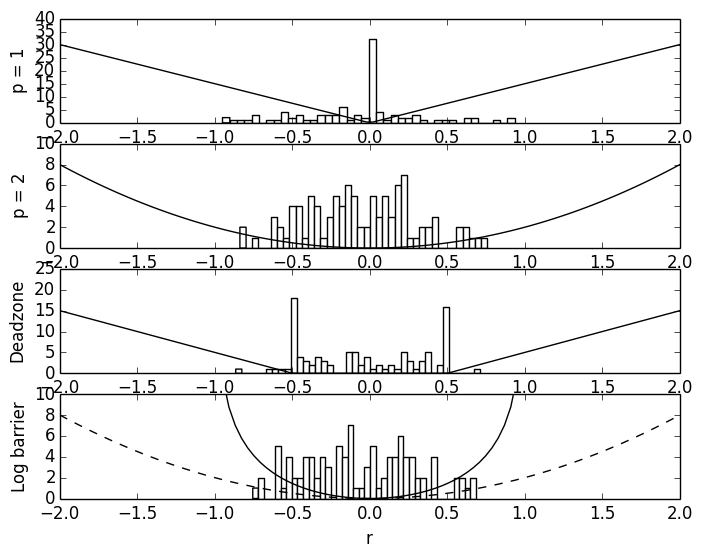

In [210]:
r_x = linspace(-2, 2, 100);
r1 = A*x1.value-b
r2 = A*x2.value-b
r3 = A*x3.value-b
r4 = A*x4.value-b
subplot(411)
plt[:hist](r1, bins = 40, facecolor = "w");
axis([-2, 2, 0, 40]);
plot(r_x, 15*abs(r_x), "k");
ylabel("p = 1");
subplot(412)
plt[:hist](r2, bins = 40, facecolor = "w");
axis([-2, 2, 0, 10]);
plot(r_x, 2*r_x.^2, "k");
ylabel("p = 2");
subplot(413)
plt[:hist](r3, bins = 40, facecolor = "w");
axis([-2, 2, 0, 25]);
deadzone(x, a) = max(abs(x)-a, 0);
plot(r_x, 10*deadzone(r_x, a1), "k");
ylabel("Deadzone");
subplot(414)
plt[:hist](r4, bins = 40, facecolor = "w");
axis([-2, 2, 0, 10]);
log_barrier(x, a) = -a^2*log(max(1-(x/a).^2, 0));
plot(r_x, 5*log_barrier(r_x, a2), "k")
plot(r_x, 2*r_x.^2, "k--");
xlabel("r");
ylabel("Log barrier");